# Análise de Dados de Filmes Exibidos no Brasil de 2009 até 2019
Com base nos dados disponibilizados pela Ancine e com a orientação da Aula 02 Análise de Dados em Python pela LABHacker - Câmara dos deputados. Realizei um estudo de análise sobre os filmes nacionais e estrangeiros exibidos no periodo 2009 até 2019 nos Cinemas do Brasil.


LABHacker - Câmara dos deputados (https://www.youtube.com/watch?v=2oZHg3HOtcY&list=PLqiFjCF_dtcymXtdjwAP4s7tRoW4CYwnH&index=3)

Origem do arquivo: https://oca.ancine.gov.br/cinema

Nome do arquivo: Listagem de Filmes Brasileiros e Estrangeiros Lançados 2009 a 2019 





### Importando as bibliotecas necessárias

In [111]:
import pandas as pd

import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt


In [112]:
df= pd.read_excel('2121.xlsx',skiprows=2,skipfooter=21)


### Conferindo a existência de dados nulos

In [113]:
df.isnull().sum()

Ano de Lançamento                   0
Título da obra                      0
CPB/ROE                             0
Gênero                              0
País(es) produtor(es) da obra       0
                                 ... 
Unnamed: 1019                    4365
Unnamed: 1020                    4365
Unnamed: 1021                    4365
Unnamed: 1022                    4365
Unnamed: 1023                    4365
Length: 1024, dtype: int64

###  Deletando as colunas com dados nulos

### Conferindo a retirada


In [114]:
df = df.dropna(axis=1)
df.isnull().sum()

Ano de Lançamento                  0
Título da obra                     0
CPB/ROE                            0
Gênero                             0
País(es) produtor(es) da obra      0
Nacionalidade da obra              0
Data de lançamento                 0
Empresa distribuidora              0
Origem da empresa distribuidora    0
Salas no Lançamento                0
Máximo de Salas Ocupadas           0
Público acumulado                  0
Renda (R$) acumulada               0
dtype: int64

### Renomeando as colunas

In [115]:
df.columns=['ano', 'filme', 'roe', 'genero','paisProd', 'nacionalidade','data', 'distribuidora','distribuidoraOrigem', 'salaLan','salaMax', 'publico','renda']

### Selecionando as linhas que possuem valores "ND"

In [116]:

index = df[(df.salaLan.str.contains('ND')==True)|(df.salaMax.str.contains('ND')==True)|(df.publico.str.contains('ND')==True)|(df.renda.str.contains('ND')==True)].index
index
column=['filme','salaLan','salaMax','publico','renda','ano']
df.loc[index,column].shape

(27, 6)

Total de 27 linhas que possuem valores "ND"

In [117]:
rows = df.index.stop
print('N° de ND na coluna salaLan:',df.salaLan.str.contains('ND',regex=False).sum(),'- Relação de ND para coluna salaLan:',np.round(df.salaLan.str.contains('ND',regex=False).sum()/rows*100,2),"%")
print('N° de ND na coluna salaMax:',df.salaMax.str.contains('ND',regex=False).sum(),'- Relação de ND para coluna salaMax:',np.round(df.salaMax.str.contains('ND',regex=False).sum()/rows*100,2),"%")
print('N° de ND na coluna publico:',df.publico.str.contains('ND',regex=False).sum(),'- Relação de ND para coluna publico:',np.round(df.publico.str.contains('ND',regex=False).sum()/rows*100,2),"%")
print('N° de ND na coluna renda:',df.renda.str.contains('ND',regex=False).sum(),'- Relação de ND para coluna renda:',np.round(df.renda.str.contains('ND',regex=False).sum()/rows*100,2),"%")




N° de ND na coluna salaLan: 22 - Relação de ND para coluna salaLan: 0.5 %
N° de ND na coluna salaMax: 7 - Relação de ND para coluna salaMax: 0.16 %
N° de ND na coluna publico: 21 - Relação de ND para coluna publico: 0.48 %
N° de ND na coluna renda: 21 - Relação de ND para coluna renda: 0.48 %


### Recuperando valores 
####    - Analisando o Output dos valores ND para as colunas:
        N° de ND na coluna salaLan: 22 - Relação de ND para coluna salaLan: 0.5 %
        N° de ND na coluna salaMax: 7 - Relação de ND para coluna salaMax: 0.16 %
        N° de ND na coluna publico: 21 - Relação de ND para coluna publico: 0.48 %
        N° de ND na coluna renda: 21 - Relação de ND para coluna renda: 0.48 %
        
        Total de 27 linhas afetadas.
Por ter uma porcentagem pequena na perda de dados para a coluna, exclui as linhas com "ND" e mantive as colunas.

####    - Alimentando valores ND      
        Para a coluna renda, que estão com valores preenchidos, possui apenas a coluna sala de lançamento como ND.
        Irei substituir os valores 'ND' da sala de lançamento com os valores da sala Max.
        Assim, não há perda informações importantes de publico e renda devido a uma coluna não crítica.


In [118]:
df.loc[index,column][(df.renda!='ND')]


<ipython-input-118-37f118694d5e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[index,column][(df.renda!='ND')]


,filme,salaLan,salaMax,publico,renda,ano
36,Fumando Espero,ND,7,2596,16555.5,2009
290,Tony Manero,ND,8,280,2020.5,2009
718,Walachai,ND,8,1262,11903.08,2011
880,Os muppets,ND,276,245715,1983418.79,2011
1105,Ataque ao prédio,ND,1,162,1552.2,2012
1188,O abrigo,ND,3,437,4044.56,2012


In [119]:

index = df.loc[index,column][(df.renda!='ND')].index
index

<ipython-input-119-a8013b746f24>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index = df.loc[index,column][(df.renda!='ND')].index


Int64Index([36, 290, 718, 880, 1105, 1188], dtype='int64')

In [120]:
df.loc[index,'salaLan']=df.loc[index,'salaMax']
df.loc[index,column]

,filme,salaLan,salaMax,publico,renda,ano
36,Fumando Espero,7,7,2596,16555.5,2009
290,Tony Manero,8,8,280,2020.5,2009
718,Walachai,8,8,1262,11903.08,2011
880,Os muppets,276,276,245715,1983418.79,2011
1105,Ataque ao prédio,1,1,162,1552.2,2012
1188,O abrigo,3,3,437,4044.56,2012


In [121]:
rows = df.index.stop
print('N° de ND na coluna salaLan: 22 - Relação de ND para coluna salaLan: 0.5 % (antes)')
print('N° de ND na coluna salaLan:',df.salaLan.str.contains('ND',regex=False).sum(),'- Relação de ND para coluna salaLan:',np.round(df.salaLan.str.contains('ND',regex=False).sum()/rows*100,2),"%",'(depois)')
print('N° de ND na coluna salaMax:',df.salaMax.str.contains('ND',regex=False).sum(),'- Relação de ND para coluna salaMax:',np.round(df.salaMax.str.contains('ND',regex=False).sum()/rows*100,2),"%")
print('N° de ND na coluna publico:',df.publico.str.contains('ND',regex=False).sum(),'- Relação de ND para coluna publico:',np.round(df.publico.str.contains('ND',regex=False).sum()/rows*100,2),"%")
print('N° de ND na coluna renda:',df.renda.str.contains('ND',regex=False).sum(),'- Relação de ND para coluna renda:',np.round(df.renda.str.contains('ND',regex=False).sum()/rows*100,2),"%")



N° de ND na coluna salaLan: 22 - Relação de ND para coluna salaLan: 0.5 % (antes)
N° de ND na coluna salaLan: 16 - Relação de ND para coluna salaLan: 0.37 % (depois)
N° de ND na coluna salaMax: 7 - Relação de ND para coluna salaMax: 0.16 %
N° de ND na coluna publico: 21 - Relação de ND para coluna publico: 0.48 %
N° de ND na coluna renda: 21 - Relação de ND para coluna renda: 0.48 %


### Tomada de Decisão 

    Limpando a base de dados, deletando as linhas com ND

In [122]:
index = df[(df.salaLan=='ND')|(df.salaMax=='ND')|(df.publico=='ND')|(df.renda=='ND')].index # coletando os id com ND

df= df.drop(index=index, axis=0) # Deletando as linhas passando parametro index

df[(df.salaLan=='ND')|(df.salaMax=='ND')|(df.publico=='ND')|(df.renda=='ND')].count() # confirmando a retirada dos ND

ano                    0
filme                  0
roe                    0
genero                 0
paisProd               0
nacionalidade          0
data                   0
distribuidora          0
distribuidoraOrigem    0
salaLan                0
salaMax                0
publico                0
renda                  0
dtype: int64

In [123]:
df.salaLan= df.salaLan.astype(int)
df.salaMax= df.salaMax.astype(int)
df.publico= df.publico.astype(int)
df.renda= df.renda.astype(int)


### Criando colunas de valor 


In [124]:
df['salaCresc'] = df.salaMax - df.salaLan

df['ingresso'] = np.round(df.renda / df.publico,2)

In [125]:

df.genero.value_counts()

Ficção          3408
Documentário     674
Animação         240
Videomusical      22
Name: genero, dtype: int64

### Deletando as colunas 
    roe - não é informação relevante para o estudo.
    distribuidoraOrigem - está em duplicidade de informação com a coluna nacionalidade.
    genero - ficção, foi preenchida de forma indevida para de outros gêneros, como: suspense, comedia e etc. 

In [126]:
df = df.drop(columns=['roe','distribuidoraOrigem','genero'],axis=1)
df.columns

Index(['ano', 'filme', 'paisProd', 'nacionalidade', 'data', 'distribuidora',
       'salaLan', 'salaMax', 'publico', 'renda', 'salaCresc', 'ingresso'],
      dtype='object')

In [127]:
df1=df
df1.head()

,ano,filme,paisProd,nacionalidade,data,distribuidora,salaLan,salaMax,publico,renda,salaCresc,ingresso
0,2009,1983.. O Ano Azul,Brasil,Brasileira,2009-06-05,Prana Filmes,2,2,2313,23001,0,9.94
1,2009,23 Anos em 7 Segundos: 1977 - O Fim do Jejum C...,Brasil,Brasileira,2009-06-26,Fox,7,7,1718,14936,0,8.69
2,2009,A Erva do Rato,Brasil,Brasileira,2009-06-26,República Pureza,1,3,3546,31690,2,8.94
3,2009,A Festa da Menina Morta,Brasil,Brasileira,2009-06-11,Imovision,6,14,16414,131091,8,7.99
4,2009,A Ilha da Morte,Brasil,Brasileira,2009-05-08,Imovision,3,4,2177,23390,1,10.74


### Coluna com multi-valores
        A coluna paisProd possui multi valores em algumas das suas linhas. Pois, representa os países que foram responsáveis na produção de determinados filmes. Para separar esses países e manter a mesma relação, utilizei a função df.explode(),    que expande as informações em linhas e mantém o index.

In [128]:
df1= df

df_ex = df1

df_ex['paisProdList'] = df1.paisProd.str.split(',')
df_ex = df_ex.explode('paisProdList')

###  Analisando a coluna paisProdList


In [129]:
df_ex.groupby('paisProdList').publico.count().sort_values(ascending= False)

paisProdList
Estados Unidos                      1516
Brasil                              1324
França                               410
 França                              282
Alemanha                             188
                                    ... 
 Macedônia (República Yugoslava)       1
Iraque                                 1
 Macedônia                             1
Islândia                               1
 Ucrânia                               1
Name: publico, Length: 156, dtype: int64

###  Retirando os espaços existentes nos países


In [130]:
df_ex['paisProdList'] = df_ex['paisProdList'].str.strip()

df_ex.groupby('paisProdList').publico.count().sort_values(ascending= False)

paisProdList
Estados Unidos    1664
Brasil            1370
França             692
Reino Unido        226
Alemanha           209
                  ... 
Paquistão            1
Chade                1
Chipre               1
Costa Rica           1
Afeganistão          1
Name: publico, Length: 97, dtype: int64

### Criando um DataFrame com base nos países

In [131]:
columns=['paisProdList','ano', 'filme', 'nacionalidade', 'distribuidora',
         'salaLan', 'salaMax', 'publico', 'renda', 'salaCresc', 'ingresso']

dfpais = df_ex.loc[:,columns]


Text(0.5, 1.0, 'Lançamento de Filmes por países \nnos Cinemas Brasileiros ')

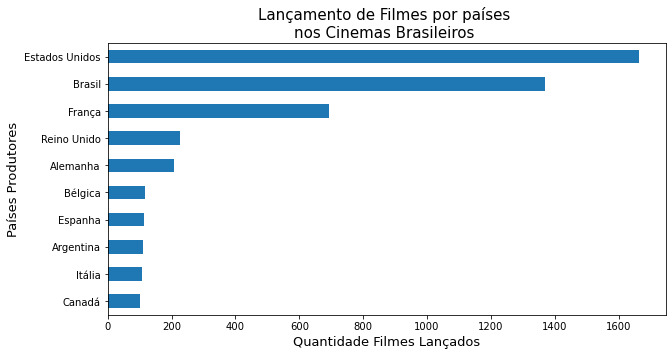

In [132]:
fig, ax = plt.subplots(figsize=(10,5))
dfpais.groupby('paisProdList').publico.count().nlargest(10).sort_values(ascending=True).plot.barh(ax=ax)
plt.ylabel('Países Produtores',fontsize=13)
plt.xlabel('Quantidade Filmes Lançados',fontsize=13)

plt.title('Lançamento de Filmes por países \nnos Cinemas Brasileiros ',fontsize=15)



Text(0.5, 1.0, 'Espectadores por Filmes Estrangeiros \n nos Cinemas Brasileiros ')

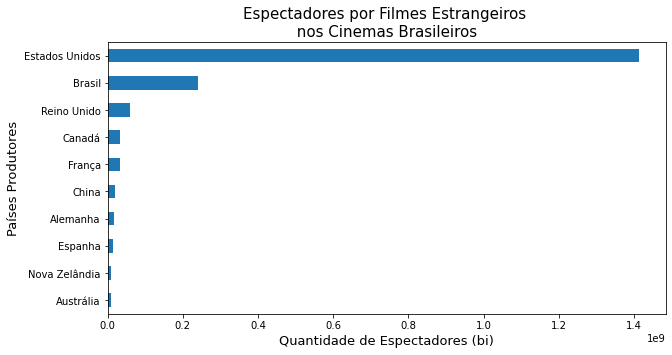

In [133]:
fig, ax = plt.subplots(figsize=(10,5))
dfpais.groupby('paisProdList').publico.sum().nlargest(10).sort_values(ascending=True).plot.barh(ax=ax)
plt.ylabel('Países Produtores',fontsize=13)
plt.xlabel('Quantidade de Espectadores (bi)',fontsize=13)

plt.title('Espectadores por Filmes Estrangeiros \n nos Cinemas Brasileiros ',fontsize=15)

### Filtrando os Países mais importantes para análise
    Selecionando os países que tem maior participação no cinema brasileiro.

In [134]:
analisePais=['Estados Unidos','Brasil','França','Reino Unido','Alemanha']

dftop= dfpais[dfpais.paisProdList.isin(analisePais)]
dftop.head()


,paisProdList,ano,filme,nacionalidade,distribuidora,salaLan,salaMax,publico,renda,salaCresc,ingresso
0,Brasil,2009,1983.. O Ano Azul,Brasileira,Prana Filmes,2,2,2313,23001,0,9.94
1,Brasil,2009,23 Anos em 7 Segundos: 1977 - O Fim do Jejum C...,Brasileira,Fox,7,7,1718,14936,0,8.69
2,Brasil,2009,A Erva do Rato,Brasileira,República Pureza,1,3,3546,31690,2,8.94
3,Brasil,2009,A Festa da Menina Morta,Brasileira,Imovision,6,14,16414,131091,8,7.99
4,Brasil,2009,A Ilha da Morte,Brasileira,Imovision,3,4,2177,23390,1,10.74


Text(0.5, 1.0, 'Valor Médio do Ingresso')

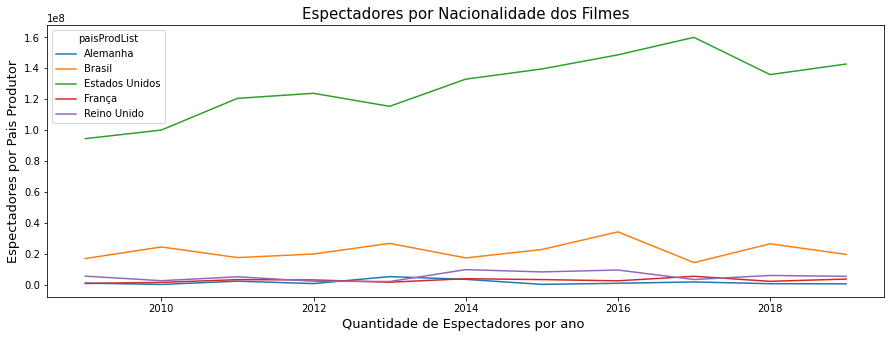

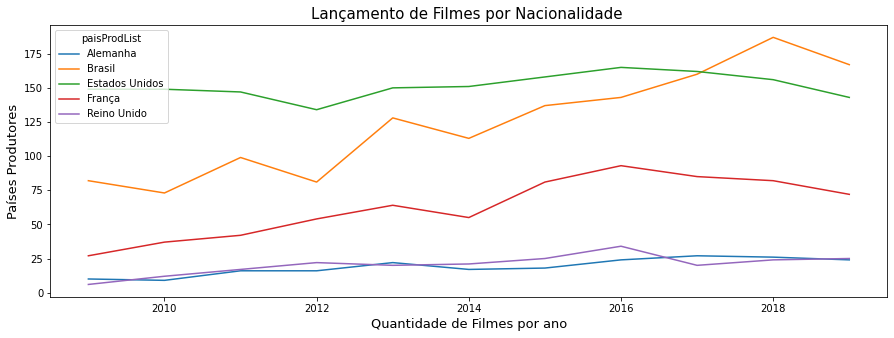

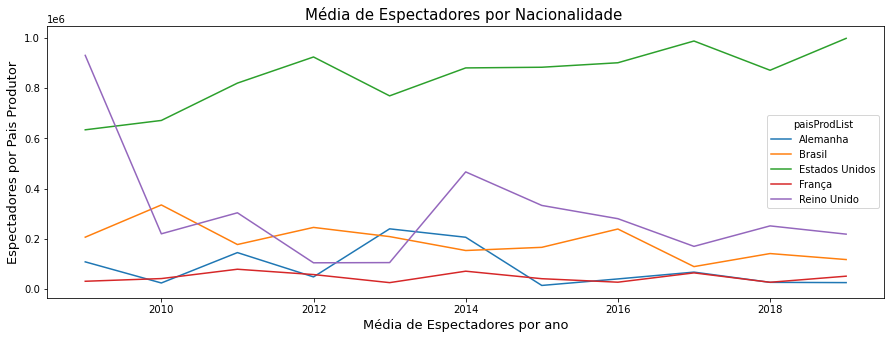

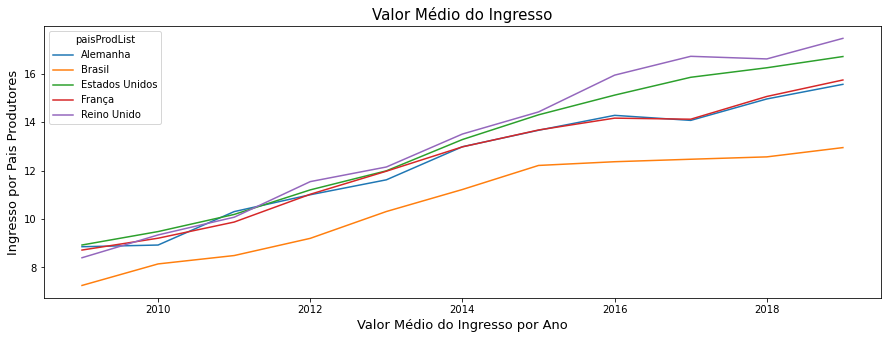

In [135]:
fig, ax = plt.subplots(figsize=(15,5))
publico = dftop.groupby(['ano','paisProdList']).sum()['publico'].unstack().plot(ax=ax)
plt.ylabel('Espectadores por Pais Produtor',fontsize=13)
plt.xlabel('Quantidade de Espectadores por ano ',fontsize=13)
plt.title('Espectadores por Nacionalidade dos Filmes', fontsize=15)

fig, ax = plt.subplots(figsize=(15,5))
filmesLancados = dftop.groupby(['ano','paisProdList']).count()['publico'].unstack().plot(ax=ax)
plt.ylabel('Países Produtores',fontsize=13)
plt.xlabel('Quantidade de Filmes por ano',fontsize=13)
plt.title('Lançamento de Filmes por Nacionalidade ', fontsize=15)

fig, ax = plt.subplots(figsize=(15,5))
filmesLancados = dftop.groupby(['ano','paisProdList']).mean()['publico'].unstack().plot(ax=ax)
plt.ylabel('Espectadores por Pais Produtor',fontsize=13)
plt.xlabel('Média de Espectadores por ano',fontsize=13)
plt.title('Média de Espectadores por Nacionalidade ', fontsize=15)

fig, ax = plt.subplots(figsize=(15,5))
ingresso = dftop.groupby(['ano','paisProdList']).mean()['ingresso'].unstack().plot(ax=ax)
plt.ylabel('Ingresso por Pais Produtores',fontsize=13)
plt.xlabel('Valor Médio do Ingresso por Ano',fontsize=13)
plt.title('Valor Médio do Ingresso', fontsize=15)


###  Espectadores por Nacionalidade 
  
    1- Filmes norte-americanos, são os mais assistidos pelo público brasileiro. Aumentando o número de espectadores  a cada ano, mas sofreu uma queda 15% em 2017.
    
    2- Filmes nacionais, têm sido o segundo mais visto pelos brasileiros. Possuindo alguns anos acima da média, tais como:   2010, 2013 e 2016.

### Lançamento de Filmes por Nacionalidade no Cinema Brasileiro

    1- Estados Unidos - tem sido o pais com maior número de filmes lançados nos cinemas brasileiros. No entanto, em 2016, sofreu uma queda que se estende até 2019. Perdendo o seu posto em 2018 como o pais com maior lançamento de filmes.
    
    2- Brasil - ao longo dos anos aumentou o número de filmes lançados, superando os Estados Unidos em 2018.
    
    3- França, tem ganhado espaço nos cinemas brasileiros, sendo o pais com a terceira maior participação. Porém, sofreu uma queda em 2016, semelhante do Estados Unidos.

### Média de Espectadores por Nacionalidade

    1-Estados Unidos - Apesar da queda do número de lançamento dos filmes em 2016, não houve impacto no crescimento de espectadores. Devido a isso, a média de espectadores se manteve em alta.
    
    2-Brasil - Apesar do crescimento dos filmes nacionais, não houve o mesmo crescimento para a quantidade de espectadores. Como resultado, a média de espectadores por filmes se manteve em terceiro lugar na maior parte dos anos. Somente em dois anos que ficou em segundo lugar, sendo eles: 
        *2010 - O filme mais visto: Tropa de Elite 2 - N° Espectadores: 11.146.723.
        *2012 - O filme mais visto: De pernas pro ar 2- N° Espectadores: 4.846.273.
        
###  Valor Médio do Ingresso 

    Filmes Estrangeiros - Possuem o valor médio dos ingressos semelhantes, havendo uma discrepância em 2016. Onde os valores dos Estados Unidos e Reino Unido se separam dos demais.
    
    Filmes Nacionais - Os ingressos para filmes nacionais são em média 14% mais barato comparado com os estrangeiros.

###  Criando  DataFrame para Filmes Nacionais

In [136]:
dfnac=dfpais[dfpais.nacionalidade=='Brasileira']
dfnac.groupby('paisProdList').publico.count().nlargest(5)

paisProdList
Brasil       1356
Argentina      34
França         25
Portugal       23
Uruguai        14
Name: publico, dtype: int64

In [137]:
dfnac.groupby('paisProdList').publico.sum().nlargest(5)

paisProdList
Brasil       239615772
França         1408854
Portugal        729705
Alemanha        646012
Argentina       389375
Name: publico, dtype: int32

###  Devido ao fato do Brasil ser um outlier, ele foi desconsiderado nesta análise 

    Considerando os principais países para os filmes nacionais.

In [138]:

topnac=['Argentina','França','Portugal','Alemanha','Uruguai','Reino Unido']

dfnac = dfnac[dfnac.paisProdList.isin(topnac)]



Text(0.5, 1.0, 'Espectadores para os Filmes Nacionais com Participação de Países Estrangeiros')

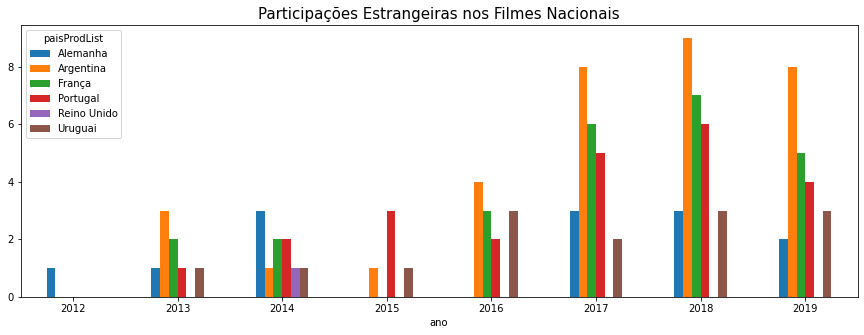

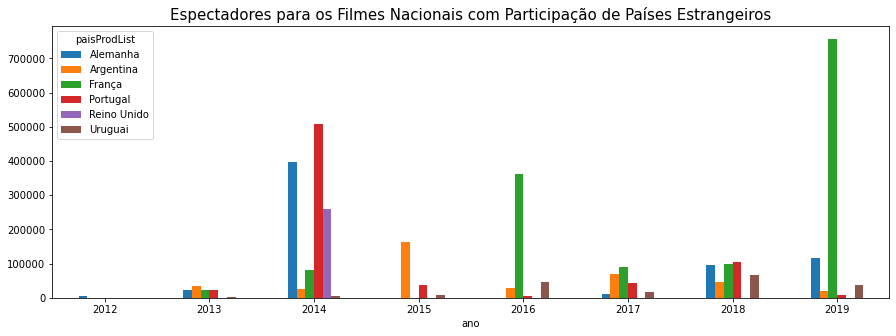

In [139]:

fig, ax = plt.subplots(figsize=(15,5))
somaFilmes = dfnac.groupby(['ano','paisProdList']).count()['publico'].unstack().plot.bar(ax=ax,rot=0)
plt.title('Participações Estrangeiras nos Filmes Nacionais',fontsize=15)
                                                                                         
fig, ax = plt.subplots(figsize=(15,5))                                                                                         
somaEspctadores = dfnac.groupby(['ano','paisProdList']).sum()['publico'].unstack().plot.bar(ax=ax,rot=0)
plt.title('Espectadores para os Filmes Nacionais com Participação de Países Estrangeiros',fontsize=15)


### Participações Estrangeiras nos Filmes Nacionais.

    1- Nos anos 2016 até 2019, Argentina tem sido o pais com maior participação nos filmes nacionais. Seguido pela França e Portugal.
    
### Espectadores por Filmes Nacionais com Participação de Outros Países.
    
    1- Apesar da Argentina ter sido o pais que mais cresceu com participações de filmes. Isso não se reflete na quantidade de espectadores brasileiros. Sendo o pais com menor público nos anos de 2018 e 2019.
    
    2-França, Portugal e Alemanha, foram os países que tiveram maior quantidade de espectadores. 
    Os anos de maior participação foram:
        2014 - Portugal, com o filme: Getúlio - N° Espectadores: 508.901
        2014 - Alemanha, com o filme: Trash - A Esperança vem do Lixo - N° Espectadores: 259.283
        2016 - França, com o filme: Aquarius - N° Espectadores: 356.979        
        2019 - França, com o filme: Bacurau - N° Espectadores: 735.191
    

    